In [21]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [87]:
#function that receives 2 strings with 4 bit binnary digits and returns a 
#quantum circuit with thes bits mapped in them
def addNumbers(a, b):
    qc = QuantumCircuit(19, 5)
    for i in range(len(a)):
        if(a[i] == '1'):
            qc.x(3 - i)
    
    for i in range(len(b)):
        if(b[i] == '1'):
            qc.x(7 - i)
    return qc

In [117]:
#initializes the numbers
#qubits from 0 to 3 = first number
#qubits from 4 to 7 = second number
qc = addNumbers("1101", "0110")

qc.barrier()

#performs the operation of summing the 2 digits without carrying about carry or overflow
qc.cx(0, 8)
qc.cx(4, 8)
qc.ccx(0, 4, 12)

qc.cx(1, 9)
qc.cx(5, 9)
qc.ccx(1, 5, 13)
qc.ccx(5, 12, 13)
qc.ccx(1, 12, 13)
qc.cx(12, 9)

qc.cx(2, 10)
qc.cx(6, 10)
qc.ccx(2, 6, 14)
qc.ccx(6, 13, 14)
qc.ccx(2, 13, 14)
qc.cx(13, 10)

qc.cx(3, 11)
qc.cx(7, 11)
qc.ccx(3, 7, 15)
qc.ccx(7, 14, 15)
qc.ccx(3, 14, 15)
qc.cx(14, 11)

qc.barrier()

for i in range(4):
    qc.measure(i + 8 ,i)
    
qc.measure(15, 4)

#qc.draw()

10011


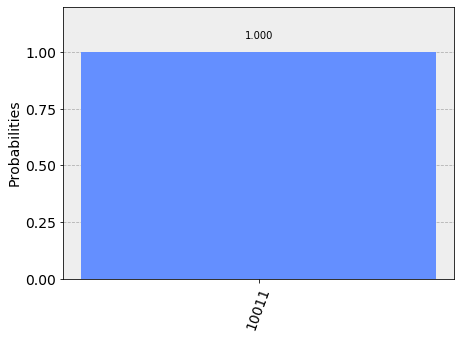

In [118]:
backend = Aer.get_backend("qasm_simulator")

a = execute(qc, backend).result().get_counts()

print("".join(a.keys()))
plot_histogram(a)
